```{math}
\def\b{\mathsf{b}}
\def\c{\mathsf{c}}
\def\kappab{\kappa_{\b}}
\def\kappac{\kappa_{\c}}
\def\kappabstar{k_{\b}}
\def\kappacstar{k_{\c}}
```


(equilibrium_formalism)=
# Equilibrium formalism  

In preparation for our discussion of conformational coupling in [Receptor Dimers](receptor_dimers_overview)), this section illustrates the _equilibrium formalism_ for a monomeric receptor model.  In essence, we will repeat our analysis of sequential [Ligand Binding](ligands) and [Equilibrium Binding Curves](equilibrium_binding_curves_and_rooted_spanning_trees), but we will do so using a helpful notation, developed in {cite:ps}`ConradiSmith2020` (see [Welcome to Receptors](welcome_to_receptors)).

## Two equilibrium constants in the three-state receptor model

The receptor model's state-transition diagram has the topology of a symmetric directed [path graph](example_graphs:path_graph) on 3 vertices. The weighted rooted [spanning tree](https://en.wikipedia.org/wiki/Spanning_tree) that specifies the parmaters of equilibrium receptor model is shown below.

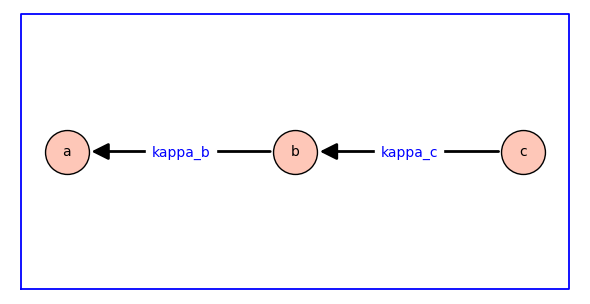

In [1]:
var('a b c kappa_b kappa_c')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kappa_b)
T.set_edge_label(c,b,kappa_c)
T.plot(figsize=6,pos={a:(0,0),b:(2,0),c:(4,0)},edge_labels=True,graph_border=True,vertex_size=1000)

In this diagram, `kappa_c` and `kappa_c` are dimensionless equilibrium constants that will often be rendered as  {math}`\kappab` and {math}`\kappac` in the mathematical expressions below.

The edges of the spanning tree are directed backwards, i.e., the forward reaction is against the direction of the arrow.  For example, the reaction labelled with the equilibrium constant {math}`\kappab` has {math}`a` as reactant and {math}`b` as product; consequently, increasing {math}`\kappab` decreases the equilibrium probability (relative fraction) of state {math}`a` and increases the probability of state {math}`b`.

The three states are labelled so that the reactant comes before the product in dictionary order ({math}`a` to {math}`b` to {math}`c`).  The subscript of the equilibrium constants {math}`\kappab` and {math}`\kappac` are chosen to match the label of the _products_.

## Including the ligand concentration dependence of equilibrium constants 

The dependence of the two equilibrium constants on ligand concentration is encorporated by defining {math}`\kappab = \kappabstar x` and {math}`\kappac = \kappacstar x` where {math}`\kappabstar` and {math}`\kappacstar` are association constants with physical dimension of inverse concentration, and {math}`x` is ligand concentration.

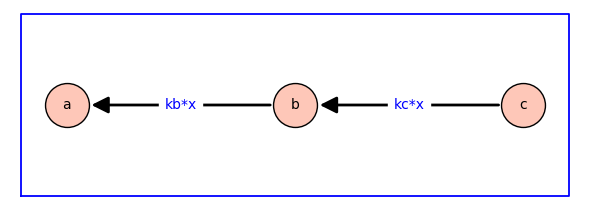

In [2]:
var('a b c x kb kc')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kb*x)
T.set_edge_label(c,b,kc*x)
T.plot(figsize=6,pos={a:(0,0),b:(3,0),c:(6,0)},edge_labels=True,graph_border=True,vertex_size=1000)

## The probability of each receptor state 

For the receptor model above, the probability of state {math}`i` is given by
{math}`\pi_i = z_i / z_T` where  {math}`z_T= \textstyle \sum_i z_i`, and 

```{math}
:label: equilibrium:z
z_a = 1 \quad z_b = \kappab = \kappabstar x \quad  z_c =\kappab \kappac = \kappabstar \kappacstar x^2 \, .
```
That is,
\begin{equation}
\pi_a =  \frac{1}{1+ \kappabstar x  +  \kappabstar \kappacstar x^2} \, ,  \quad \pi_b =  \frac{\kappabstar x}{1+ \kappabstar x +  \kappabstar  \kappacstar x^2}   \quad \mbox{and}  \quad \pi_c = \frac{\kappabstar  \kappacstar x^2 }{1+ \kappabstar x +  \kappabstar \kappacstar x^2 }  \, .
\end{equation}

It is helpful to  present this set of rational functions using the following compact notation:
\begin{equation}
 [ \pi_a  :  \pi_b :  \pi_c ] = [1 :\kappab : \kappab \kappac ]  = [1 : \kappabstar x :\kappabstar \kappacstar x^2  ] \,  .
\end{equation}

In expressions of this kind,  it is understood that
\begin{equation}
[ z_1 \! : \! z_2 : \! \cdots \! : \! z_n ] = [ \lambda z_1 \! : \! \lambda  z_2 : \! \cdots \! : \! \lambda  z_n ]
\end{equation}
for any {math}`\lambda \neq 0`.  Furthermore, {math}`\lambda = 1/\sum_i x_n` gives the probability distribution {math}`\pi = (\pi_1, \pi_2, \ldots, \pi_n)` where {math}`1=\sum_i \pi_i`.  Prior to normalization, we will refer to {math}`[ z_1 \! : \! z_2 : \! \cdots \! : \! z_n ]` as _relative probabilites_ for each receptor state.


## From spanning tree to relative probabilities

Using a spanning tree as the specification for the receptor model, the following `Sagemath` commands extract symbolic expressions for the fraction of receptors in each state.

In [3]:
paths = T.all_simple_paths(starting_vertices=[a,b,c],ending_vertices=[a],trivial=True)
print(paths)

[[a], [b, a], [c, b, a]]


The list `paths` has length 3. `paths[0]=[a]`.  `paths[1]=[b,a]`.  `paths[2]=[c,b,a]`.  These are vertices encountered in paths beginning at vertex 0 (`a`), 1 (`b`), and 2 (`c`) and (in each case) ending at vertex `a`.

The relative probability of each state is obtained as the product of the edge weights in each path, with the trivial path yielding 1 (an empty product).

In [4]:
paths = T.all_simple_paths(starting_vertices=[a,b,c],ending_vertices=[a],trivial=True)
print(paths)
z = []
for p in paths:
    w = 1
    for i in range(len(p)-1):
       w = w*T.edge_label(p[i],p[i+1])
    z.append(w)
print(z)

[[a], [b, a], [c, b, a]]
[1, kb*x, kb*kc*x^2]


The list `z` also has length 3.  `z[0]=1`.  `z[1]=kb*x`.  `z[2]=kb*kc*x^2`.  These are the relative probabilities {math}`z_a`, {math}`z_b`, and {math}`z_c`, which agree with our previous analytical calculation {eq}`equilibrium:z`.

Symbolic expressions for the normalized probabilities are found as follows.

In [5]:
ztot = sum(z);
prob = []
for i in range(len(z)):
    prob.append(z[i]/ztot)
print(prob)

[1/(kb*kc*x^2 + kb*x + 1), kb*x/(kb*kc*x^2 + kb*x + 1), kb*kc*x^2/(kb*kc*x^2 + kb*x + 1)]


## Equilibrium binding curve

After choosing values for the association constants `kb` and `kc`, equilibrium binding curves can be plotted.

p[0] = 1/(x^2 + x + 1)
p[1] = x/(x^2 + x + 1)
p[2] = x^2/(x^2 + x + 1)


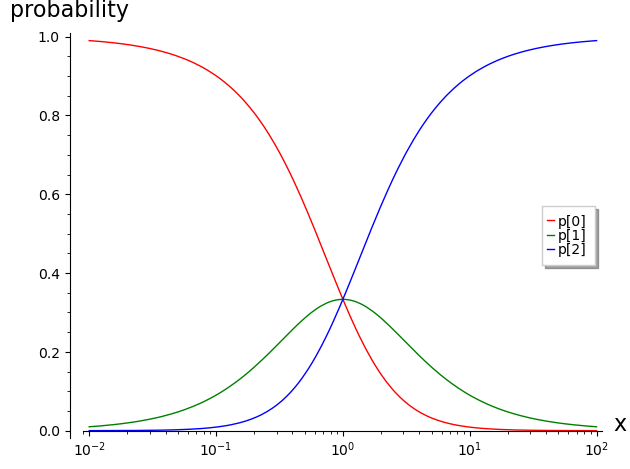

In [6]:
xmin=0.01; xmax=100;
params = {kb:1,kc:1}
p = [0]*3
col = ['red','green','blue']
for i in range(3):
    p[i] = plot_semilogx(prob[i].subs(params), (x, xmin, xmax), color=col[i], legend_label='p[%s]'%i, axes_labels=['x', 'probability'])
    print('p[%s] ='%i,prob[i].subs(params))
show(sum(p))

The above plot can be compared to those in the previous section ([Ligand Binding](ligands)). The only distinction is the usage of the notation that is the focus of this section. This notation is especially helpful in the analysis of conformational coupling of [recepter dimers](receptor_dimers_overview) and higher-order oligomers.


## References

```{bibliography}
:filter: docname in docnames
```